## In this chapter, you will be introduced to Panda's DataFrames. You will use Pandas to import and inspect a variety of datasets, ranging from population data obtained from The World Bank to monthly stock data obtained via Yahoo! Finance. You will also practice building DataFrames from scratch, and become familiar with Pandas' intrinsic data visualization capabilities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DataFrame data types
Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and NaN ('Not-a-Number') types which often indicate missing data. In this exercise, we have imported pandas as pd and read in the world population data which contains some NaN values, a value often used as a place-holder for missing or otherwise invalid data entries. Your job is to use df.info() to determine information about the total count of non-null entries and infer the total count of 'null' entries, which likely indicates missing data. 

## NumPy and pandas working together
Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods. 

__Your job is to extract the values and store them in an array using the attribute .values. You'll then use those values as input into the NumPy np.log10() method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy np.log10() method and compare the results.__

__Instruction__
- Import numpy using the standard alias np.
- Assign the numerical values in the DataFrame df to an array np_vals using the attribute values.
- Pass np_vals into the NumPy method log10() and store the results in np_vals_log10.
- Pass the entire df DataFrame into the NumPy method log10() and store the results in df_log10.
- Inspect the output of the print() code to see the type() of the variables that you created.

In [2]:
df = pd.read_csv('world_population.csv')
df

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


In [3]:
np_vals = df.values
np_vals

array([[1.96000000e+03, 3.03497056e+09],
       [1.97000000e+03, 3.68482270e+09],
       [1.98000000e+03, 4.43659036e+09],
       [1.99000000e+03, 5.28271599e+09],
       [2.00000000e+03, 6.11597449e+09],
       [2.01000000e+03, 6.92428294e+09]])

In [4]:
np_vals_log10 = np.log10(np_vals)
np_vals_log10

array([[3.29225607, 9.48215448],
       [3.29446623, 9.5664166 ],
       [3.29666519, 9.64704933],
       [3.29885308, 9.72285726],
       [3.30103   , 9.78646566],
       [3.30319606, 9.84037481]])

In [6]:
# Create array of new DataFrame by passing df to np.log10():
df_log10 = np.log10(df)
df_log10

,Year,Total Population
0,3.292256,9.482154
1,3.294466,9.566417
2,3.296665,9.647049
3,3.298853,9.722857
4,3.301030,9.786466
5,3.303196,9.840375


In [7]:
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. list_keys contains the column names 'Country' and 'Total'. list_values contains the full names of each country and the number of gold medals awarded. The values have been taken from Wikipedia.

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the list(), zip(), dict() and pd.DataFrame() functions. Pandas has already been imported as pd.

Note: The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this zip object into a list, you'll need to use list().

In [8]:
list_keys = ['Country', 'Total']a
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [11]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))
zipped

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [12]:
# Build a dictionary with the zipped list: data
data = dict(zipped)
# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
df

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


## Labeling your data
You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we have imported pandas as pd and defined a DataFrame df containing top Billboard hits from the 1980s (from Wikipedia). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels a, b, c, d. Your job is to use the df.columns attribute to re-assign descriptive column labels.

In [24]:
df = pd.DataFrame({'a':[1980, 1981, 1982], 'b':['Blondie', 'Chistorpher Cross', 'Joan Jett'], 'c':['Call Me', 'Arthurs Theme', 'I Love Rock and Roll'],
                  'd':['6', '3', '7']})
df

,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [25]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


## Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list cities.

Your job is to construct a DataFrame from the list of cities and the string 'PA'

In [17]:
cities = ['Manheim','Preston park','Biglerville','Indiana','Curwensville','Crown','Harveys lake','Mineral springs','Cassville','Hannastown','Saltsburg','Tunkhannock','Pittsburgh','Lemasters','Great bend']

In [18]:
state = 'PA'

In [22]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df1 = pd.DataFrame(data)


In [23]:
df1

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


In [26]:
df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Chistorpher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


## Reading a flat file
In previous exercises, we have preloaded the data for you using the pandas function read_csv(). Now, it's your turn! Your job is to read the World Bank population data you saw earlier into a DataFrame using read_csv(). The file is available in the variable data_file.

The next step is to reread the same file, but simultaneously rename the columns using the names keyword input parameter, set equal to a list of new column labels. You will also need to set header=0 to rename the column labels.

Finish up by inspecting the result with df.head() and df.info() in the IPython Shell (changing df to the name of your DataFrame variable).

pandas has already been imported and is available in the workspace as pd.

Instruction

In [28]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [31]:
df = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
df
df2

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


## Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from Yahoo Finance. The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable file_messy.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Your job is to use pandas to read the data from this problematic file_messy using non-default input options with read_csv() so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable file_clean that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using help() on the pandas function pd.read_csv()

In [36]:
# read the raw file as-is`
messy_df = pd.read_csv('messy_stock_data.tsv.txt')
messy_df

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 45.51 43.56 48.70 53.88 55.40,NaN
# That MSFT is MicroSoft,NaN
GOOGLE 512.42 537.99 559.72 540.50 535.24 532.92 590.09 636.84 617.93 663.59 735.39 755.35,NaN
APPLE 110.64 125.43 125.97 127.29 128.76 127.81 125.34 113.39 112.80 113.36 118.16 111.73,NaN
# Maybe we should have bought some Apple stock in 2008?,NaN


In [39]:
# read the file with correct parameters
clean_df = pd.read_csv('messy_stock_data.tsv.txt', delimiter = ' ', header = 3, comment = '#')
clean_df

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [41]:
# Save the cleaned up DataFrame to a CSV file without the index
clean_df.to_csv('clean_stock_data.csv', index=False)

## Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame df which contains the data you need. Your job is to use the DataFrame method df.plot() to visualize the data, and then explore the optional matplotlib input parameters that this .plot() method accepts.

The pandas .plot() method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Before plotting, inspect the DataFrame in the IPython Shell using df.head(). Also, use type(df) and note that it is a single column DataFrame.

In [44]:
import random

In [45]:
values = [random.randint(76, 102) for x in range(200)]

In [46]:
values


[93,
 89,
 76,
 101,
 90,
 90,
 82,
 92,
 94,
 77,
 92,
 92,
 86,
 87,
 77,
 86,
 78,
 76,
 93,
 90,
 85,
 77,
 95,
 86,
 91,
 84,
 89,
 82,
 91,
 83,
 90,
 90,
 85,
 93,
 91,
 98,
 83,
 98,
 95,
 77,
 82,
 84,
 77,
 84,
 86,
 85,
 83,
 95,
 78,
 97,
 93,
 76,
 101,
 76,
 89,
 92,
 93,
 96,
 85,
 100,
 93,
 80,
 100,
 81,
 86,
 91,
 87,
 86,
 76,
 82,
 89,
 86,
 79,
 79,
 86,
 90,
 94,
 89,
 97,
 86,
 76,
 88,
 80,
 95,
 96,
 89,
 87,
 85,
 99,
 101,
 82,
 93,
 82,
 95,
 97,
 86,
 77,
 93,
 97,
 78,
 101,
 101,
 79,
 80,
 83,
 89,
 90,
 102,
 93,
 78,
 93,
 81,
 85,
 80,
 79,
 87,
 98,
 79,
 92,
 77,
 77,
 88,
 88,
 97,
 82,
 77,
 92,
 90,
 101,
 84,
 97,
 82,
 85,
 85,
 91,
 95,
 90,
 89,
 78,
 87,
 87,
 84,
 90,
 86,
 90,
 93,
 97,
 91,
 91,
 100,
 79,
 81,
 86,
 91,
 85,
 77,
 84,
 96,
 98,
 84,
 81,
 80,
 79,
 77,
 85,
 100,
 84,
 86,
 76,
 84,
 99,
 88,
 89,
 95,
 97,
 94,
 87,
 77,
 87,
 87,
 88,
 93,
 84,
 90,
 102,
 89,
 100,
 85,
 95,
 99,
 83,
 96,
 92,
 97,
 86,
 77,
 81,
 1

In [49]:
sample_df = pd.DataFrame({'Temperature (F)':values})
sample_df.head()

,Temperature (F)
0,93
1,89
2,76
3,101
4,90


__Instructions__
- Create the plot with the DataFrame method df.plot(). Specify a color of 'red'.
- Note: c and color are interchangeable as parameters here, but we ask you to be explicit and specify color.
- Use plt.title() to give the plot a title of 'Temperature in Austin'.
- Use plt.xlabel() to give the plot an x-axis label of 'Hours since midnight August 1, 2010'.
- Use plt.ylabel() to give the plot a y-axis label of 'Temperature (degrees F)'.
- Finally, display the plot using plt.show().

Text(0.5, 1.0, 'Temperature in Austin')

Text(0.5, 0, 'Hours since midnight August 1, 2010')

Text(0, 0.5, 'Temperature (degrees F)')

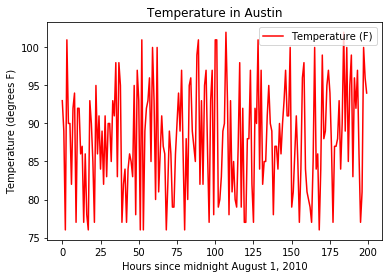

In [50]:
sample_df.plot(color = 'red')
plt.title('Temperature in Austin')
# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

## Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling df.plot() will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame df[column_list] to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots. You can cycle through them by clicking on the 'Previous Plot' and 'Next Plot' buttons.

As in the previous exercise, inspect the DataFrame df in the IPython Shell using the .head() and .info() methods.

In [54]:
dew_values = [random.randint(60, 70) for x in range(200)]
pressure_value = 1

In [56]:
sample_df2 = pd.DataFrame({'Temperature (F)':values, 'Dew Point (F)':dew_values, 'Pressure (atm)':pressure_value})
sample_df2.head()

,Temperature (F),Dew Point (F),Pressure (atm)
0,93,70,1
1,89,64,1
2,76,67,1
3,101,69,1
4,90,65,1


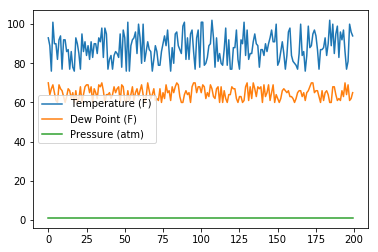

In [58]:
# Plot all columns (default)
sample_df2.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0C5CC210>,
      dtype=object)

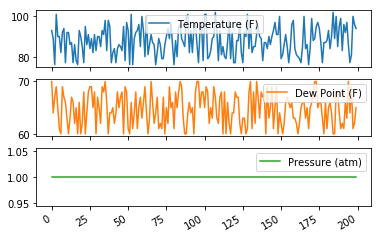

In [59]:
# Plot all columns as subplots. To do so, you need to specify subplots=True inside .plot()
sample_df2.plot(subplots = True)
plt.show()

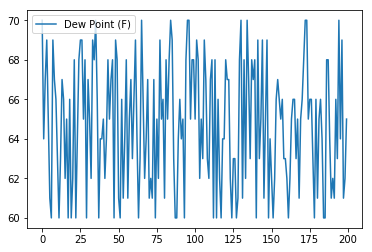

In [65]:
# plot just dew point data
sample_df2[['Dew Point (F)']].plot()
plt.show()

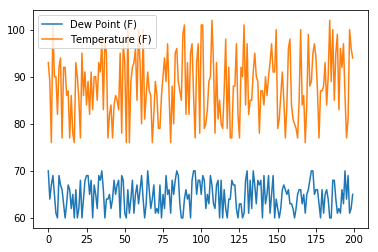

In [66]:
# Plot the Dew Point and Temperature data, but not the Pressure data
sample_df2[['Dew Point (F)', 'Temperature (F)']].plot()
plt.show()